# Factors that affect student performance

### By : Mohamed Ahmed Saad Abohassan



# Investigation Overview

>In this investigation, I wanted to look at the characteristics of students  that could be affect their grades. The main focus  and the main attributes i worked on are
( the parent education level ,gender ,Test Preparation course ,the race groubs, and Of course
 students grades in 3 subjects)
 
## Dataset Overview

>student performance dataset from Kaggle it consist of 1000 student informations like grades in 3 subjects (maths , reading ,
writing )and the parent education level 
and 4 other  attributes (gender, race, launch, test_preparation_course), 
I modified the names of the columns to be easy to use and  modified the data by adding 6 more attributes (pass_math,pass_reading,pass_writing,Total_score,percentage_score,result_score) converted the 3 subjects  grades to be shown as 
(fail/pass) and added the 3 subjects grades and make a total and percentage columns with result column as (fail /pass)


In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [41]:
#load data
df= pd.read_csv("StudentsPerformance.csv")

In [42]:
#copy from orginal df
df2=df.copy() 
df2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
#renaming the columns
df2.rename(columns = {"race/ethnicity": "race", 
                           "parental level of education":"parent_education", 
                           "test preparation course": "test_preparation_course",
                            "math score":"maths_score",
                            "reading score":"reading_score",
                            "writing score":"writing_score"},inplace=True)
df2.head()

,gender,race,parent_education,lunch,test_preparation_course,maths_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [44]:
# creating a new columns pass_math,reading_math,writing_math this columns will tell us whether the students are pass or fail
passmarks = 40  #assume passmark=40
df2['pass_math'] = np.where(df2['maths_score']< passmarks, 'Fail', 'Pass')
df2['pass_reading'] = np.where(df2['reading_score']< passmarks, 'Fail', 'Pass')
df2['pass_writing'] = np.where(df2['writing_score']< passmarks, 'Fail', 'Pass')

In [45]:
#creating a new columns of total score of each student
df2['Total_score']= df2['maths_score']+df2['writing_score']+df2['reading_score']

In [46]:
#creating a new column of percentage of each student
df2['percentage_score']=df2['Total_score']/300

In [47]:
#creating a new columns pass/fail result of each student
def result(percentage_score):
    if percentage_score >=0.33:
        return "Pass"
    else:
        return "Fail"
    
df2['result_score']=df2['percentage_score'].apply(result)

In [48]:
#the new data
df2.head()

,gender,race,parent_education,lunch,test_preparation_course,maths_score,reading_score,writing_score,pass_math,pass_reading,pass_writing,Total_score,percentage_score,result_score
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,218,0.726667,Pass
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass,247,0.823333,Pass
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass,278,0.926667,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass,148,0.493333,Pass
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass,229,0.763333,Pass


In [49]:
# convert parental level of education and race/ethnicity into ordered categorical types
ordinal_var_dict = {'parent_education': ["some high school","high school","some college","associate's degree"
                                                    ,"bachelor's degree","master's degree"],
                    'race': ['group E', 'group D', 'group C', 'group B', 'group A']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df2[var] = df2[var].astype(ordered_var)

## Comparison of parent education level

at the Bar chart  we figure out at (parental level of education) :
the highest category in it is "some collage" with prop = 22.6% , and the next from it is ""associate's degree" with prop =22.2%
and the lowest category is "master's degree" with prop = 5.9% .


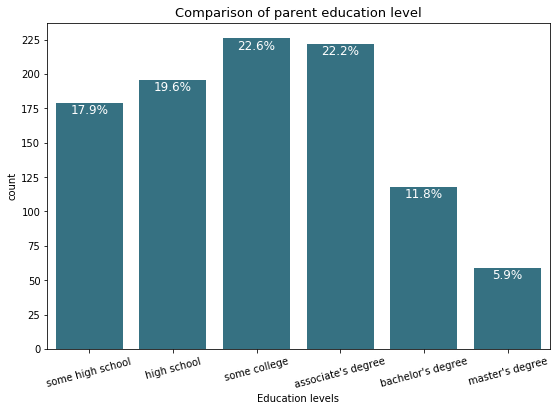

In [50]:
# create the plot
default_color = sb.color_palette('viridis',9)[3]
plt.figure(figsize = [9, 6])
sb.countplot(data = df2, x = 'parent_education', color = default_color);
# add annotations
n_df=df2.shape[0]
parental_counts = df2['parent_education'].value_counts()
locs, labels = plt.xticks() 
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = parental_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_df)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w',fontweight = 30,fontsize=12)
    
plt.xticks(rotation=15);
plt.title('Comparison of parent education level',fontweight = 30,fontsize=13);
plt.yticks([0,25,50,75,100,125,150,175,200,225]);
plt.xlabel("Education levels");


## relations between parent education and maths score,reading score,writing score,Total score

we asked at the first if the parent education affects with the result or not now we will know the answer with the point plots below:


 the avarge highest grades at all 3 subjects and the total score happened with parent education of master 's degree 
and the lowest avarge grade at math happened with parent education of high school 

so the  the parent education is realy  affects with the result.
    
    

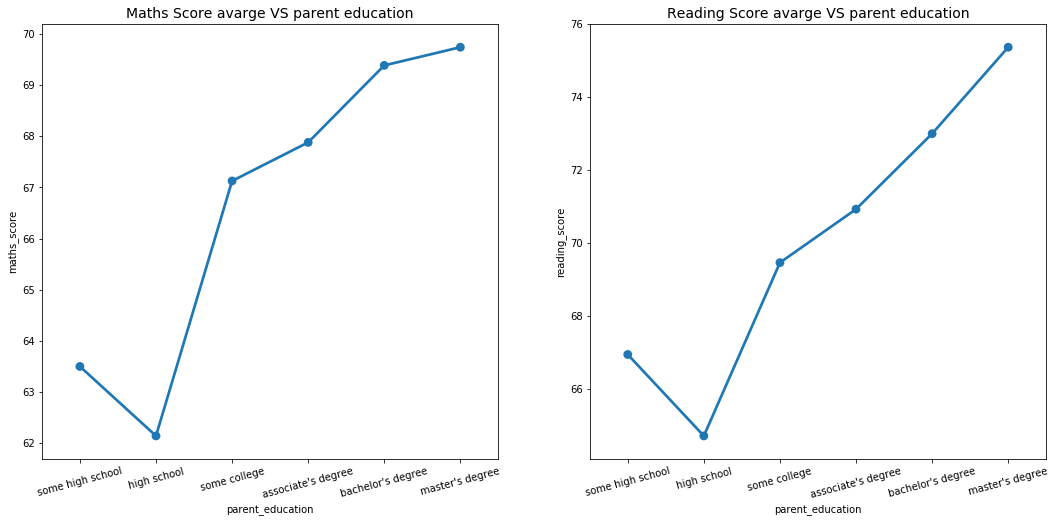

In [51]:
#relations between parent education and maths score,reading score,writing score,Total score

p1=df2.groupby('parent_education')['maths_score'].mean().sort_values()
p2=df2.groupby('parent_education')['reading_score'].mean().sort_values()
p3=df2.groupby('parent_education')['writing_score'].mean().sort_values()
p4=df2.groupby('parent_education')['Total_score'].mean().sort_values()

color=sb.color_palette()[0]
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1);    
sb.pointplot(data=df2,x=p1.index, y=p1,color=color)
plt.title("Maths Score avarge VS parent education",fontweight = 30,fontsize=14);
plt.xticks(rotation=15);


plt.subplot(1, 2, 2);    
sb.pointplot(data=df2,x=p2.index, y=p2,color=color)
plt.title("Reading Score avarge VS parent education",fontweight = 30,fontsize=14);
plt.xticks(rotation=15);



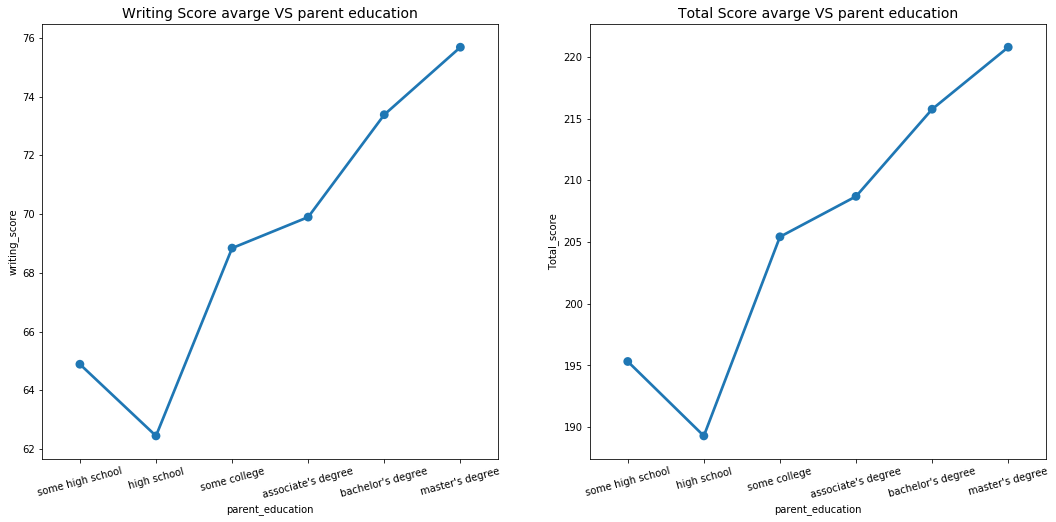

In [52]:
plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1);    
sb.pointplot(data=df2,x=p3.index, y=p3,color=color)
plt.title("Writing Score avarge VS parent education",fontweight = 30,fontsize=14);
plt.xticks(rotation=15);


plt.subplot(1, 2, 2);    
sb.pointplot(data=df2,x=p4.index, y=p4,color=color)
plt.title("Total Score avarge VS parent education", fontweight = 30,fontsize=14);
plt.xticks(rotation=15);


## Multivariate relations between  (result score vs (parent education & Total score))

we see at a high level of education like master's degree and bachelor's degree no one fail as a result score  

thats conform that parent education affect the grades of the students .

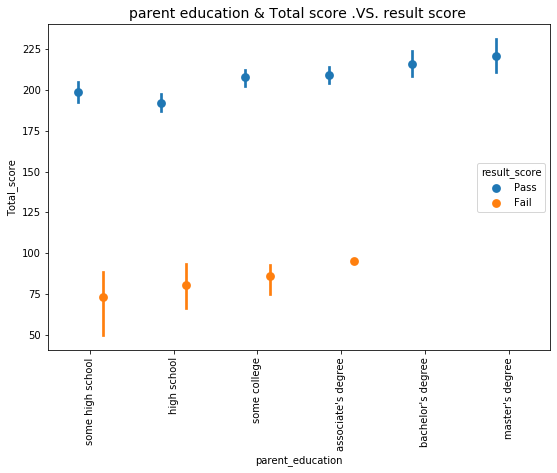

In [53]:

plt.figure(figsize=[9,6])
sb.pointplot(data = df2, x = 'parent_education', y = 'Total_score', hue = 'result_score',
                  dodge = 0.3, linestyles = "")
plt.xticks(rotation=90);
plt.legend(loc = 5, title = 'result_score');
plt.title("parent education & Total score .VS. result score ",fontweight = 30,fontsize=14);


# let's move on and see another attribute like gender and know if that affect the grades of the students .


### Student Numbers of Males VS Femals 

>the females is more than the males at the data 
females = 51.8% , males= 48.2%

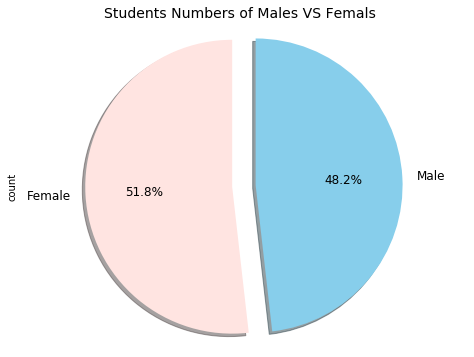

In [54]:
plt.figure(figsize = [8, 6])
colors=( 'mistyrose', 'skyblue')
plt.pie(df2['gender'].value_counts()/n_df,labels=('Female','Male'),
        explode = [0.08,0.08],autopct ='%1.1f%%'
        ,shadow = True,startangle = 90, textprops={'fontsize': 12},colors=colors);
plt.title('Students Numbers of Males VS Femals  ',fontweight = 30,fontsize=14 );
plt.axis('equal');
plt.ylabel('count')

plt.show()


## relation between gender and marks scored in each subject


at realations between the gender and the 3 subjects with the boxs plots above we discoverd that :
    the average of maths score at the males is higher than at females  (male=68.7>female=63.6), 
    the average of reading score at the female is higher than at males  (male=65.4<female=72.6),
    the average of writing score at the female is higher than at males  (male=63.3<female=72.4)
    
    

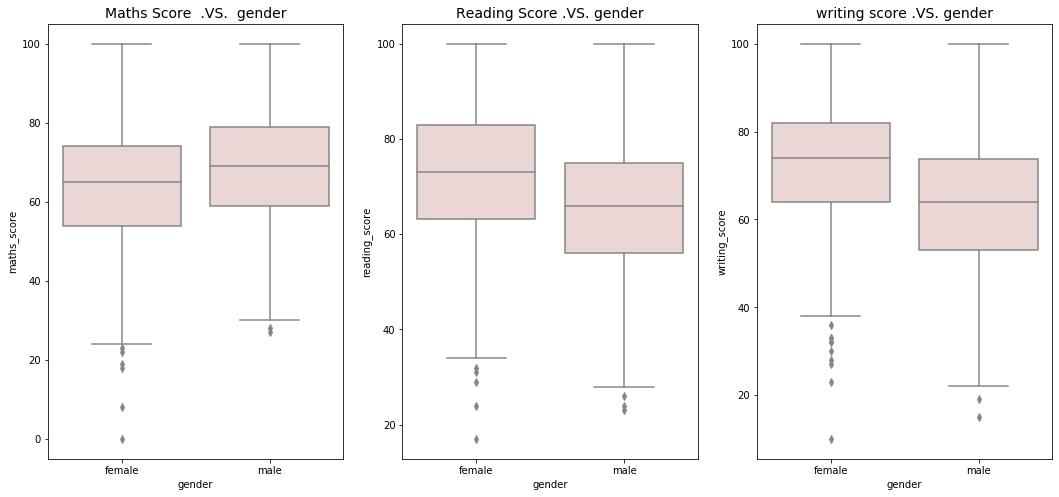

In [55]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1);
default_color = sb.color_palette('vlag',9)[5]

   #plot for maths score
sb.boxplot(data=df2,x='gender', y='maths_score',color=default_color)
plt.title("Maths Score  .VS.  gender",fontweight = 30,fontsize=14);

    #plot for reading score
plt.subplot(1, 3, 2);
sb.boxplot(data=df2,x='gender', y='reading_score',color=default_color)
plt.title("Reading Score .VS. gender",fontweight = 30,fontsize=14);
    
    #plot for writing score
plt.subplot(1, 3, 3);
sb.boxplot(data=df2,x='gender', y='writing_score',color=default_color)
plt.title("writing score .VS. gender",fontweight = 30,fontsize=14);
    
plt.show();

## relations between gender and total,percentage score 


   at realations between the gender and total,percentage score with the boxs plots above we discoverd that :
   the average of total score at the females is higher than at males  (male=197.5<female=208.7), 
   the average of percentage score at the female is higher than at males  (male=0.69<female=0.65),
        

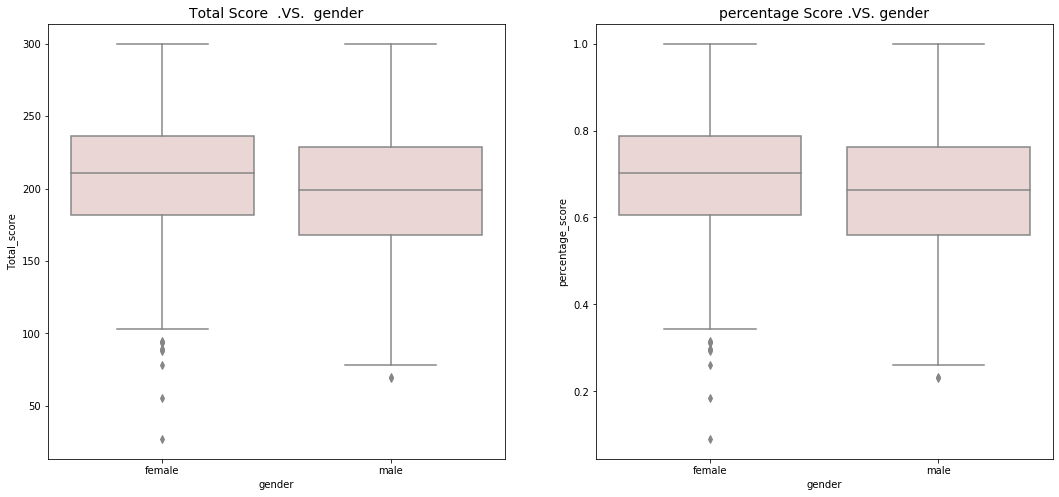

In [56]:

plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1);
default_color = sb.color_palette('vlag',9)[5]

   #plot for gender & total score score
sb.boxplot(data=df2,x='gender', y='Total_score',color=default_color)
plt.title("Total Score  .VS.  gender",fontweight = 30,fontsize=14);

   #plot for gender & percentage score 
plt.subplot(1, 2, 2);
sb.boxplot(data=df2,x='gender', y='percentage_score',color=default_color)
plt.title("percentage Score .VS. gender",fontweight = 30,fontsize=14);
    
plt.show();

## Result score  .VS.  gender 

from the plot  we see that at the result of the 3 subjects together  (Pass/Fail) the females is higher than males at the pass rate 
but it also is higher than at fail rate 

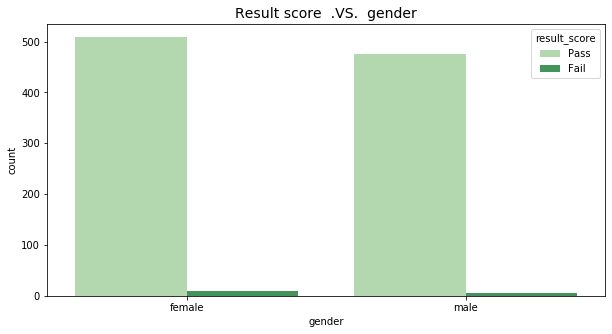

In [57]:
#plot for result score and gender 
plt.figure(figsize=(10,5))
default_color = sb.color_palette('vlag',9)[8]
sb.countplot(data = df2, x = 'gender', hue = 'result_score'
,palette = 'Greens')
plt.title("Result score  .VS.  gender",fontweight = 30,fontsize=14);


## let's move on and see another attribute like( test preparation course) and know if that affect the grades of the students .¶




>## test preparation course(none/completed)
 at this Pie chart  we discoverd that most of the students didn't completed the test preparation course . 
64.2% didn't completed the preparation and  35.8% completed the preparation.


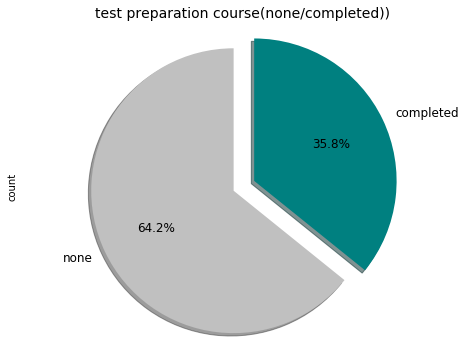

In [58]:
plt.figure(figsize = [8, 6])
colors=( 'silver', 'teal')
plt.pie(df2['test_preparation_course'].value_counts()/n_df,labels=('none','completed'),
        explode = [0.08,0.08],autopct ='%1.1f%%'
        ,shadow = True,startangle = 90, textprops={'fontsize': 12},colors=colors)
plt.title('test preparation course(none/completed)) ',fontweight = 30,fontsize=14 );
plt.axis('equal')
plt.ylabel('count')
plt.show()


## Multivariate relations between  (test preparation course & Total score .VS. result score))

and from the plot  shown it look like the students who completed test preparation course no one  fail otherswise from the students who didn't completed it there is a percentage of fail 

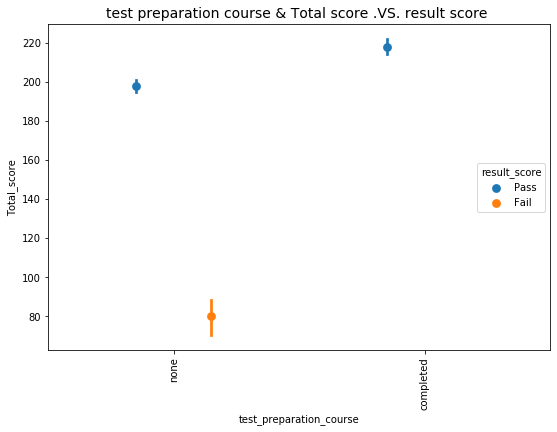

In [59]:
plt.figure(figsize = [9, 6])
sb.pointplot(data = df2, x = 'test_preparation_course', y = 'Total_score', hue = 'result_score',
                  dodge = 0.3, linestyles = "")
plt.xticks(rotation=90);
plt.legend(loc = 5, title = 'result_score')
plt.title("test preparation course & Total score .VS. result score ",fontweight = 30,fontsize=14);


## finally we here with last attribute we intersted in( race groubs ) and trying to know if that affect the grades of the students or which groub have the highest grades.




>## Comparison of race Groups
at this  Bar chart too  we figure out at (race) :
the highest numbers of students  in  "group C" with prop = 31.9% , and the next from it is "group D" with prop =26.2%
and the lowestnumbers of students  in A" with prop = 8.9% .

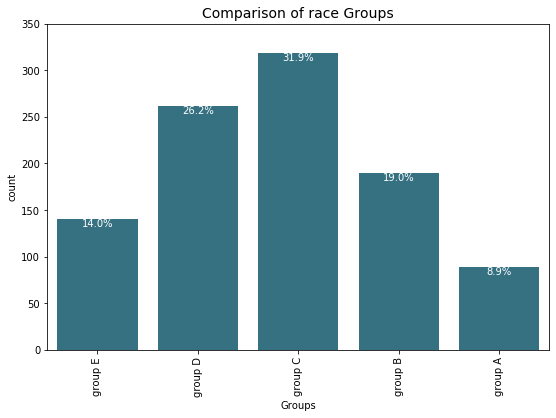

In [60]:
# create the plot
default_color = sb.color_palette('viridis',9)[3]
plt.figure(figsize = [9, 6])
sb.countplot(data = df2, x = 'race', color = default_color);
# add annotations
parental_counts = df2['race'].value_counts()
locs, labels = plt.xticks() 
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = parental_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_df)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w')
    
plt.xticks(rotation=90);
plt.title('Comparison of race Groups',fontweight = 30,fontsize=14);
plt.yticks([0,50,100,150,200,250,300,350]);
plt.xlabel("Groups");


## relations between Race and maths score,reading score,writing score,Total score

from the the point plots :


 the avarge highest grades at all 3 subjects and the total score happened with the race group "E"
and the lowest avarge grade at all 3 subjects and the total score happened with the race group "A"
        

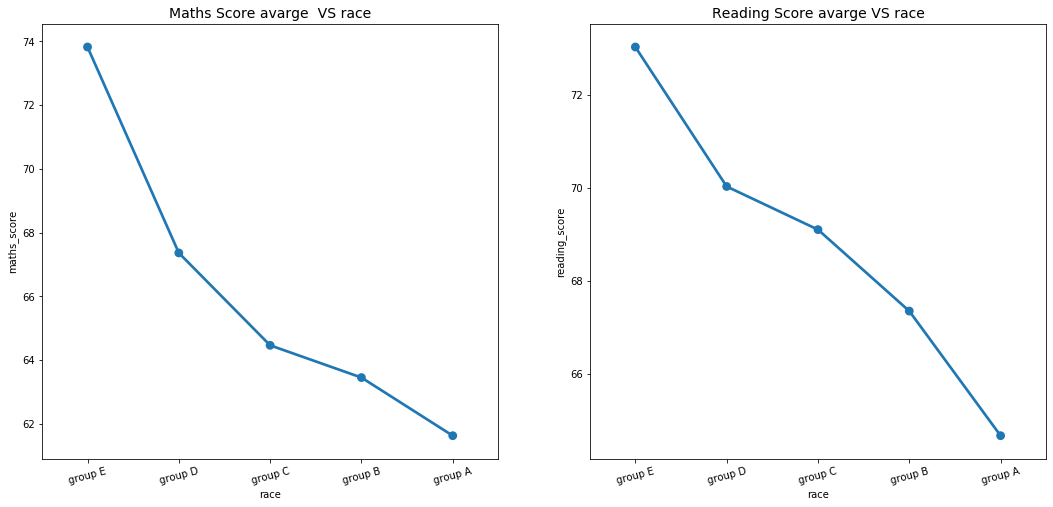

In [61]:
#relations between Race and maths score,reading score,writing score,Total score


g1=df2.groupby('race')['maths_score'].mean().sort_values()
g2=df2.groupby('race')['reading_score'].mean().sort_values()
g3=df2.groupby('race')['writing_score'].mean().sort_values()
g4=df2.groupby('race')['Total_score'].mean().sort_values()

color=sb.color_palette()[0]
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1);    
sb.pointplot(data=df2,x=g1.index, y=g1,color=color)
plt.title("Maths Score avarge  VS race",fontweight = 30,fontsize=14);
plt.xticks(rotation=15);


plt.subplot(1, 2, 2);    
sb.pointplot(data=df2,x=g2.index, y=g2,color=color)
plt.title("Reading Score avarge VS race",fontweight = 30,fontsize=14);
plt.xticks(rotation=15);



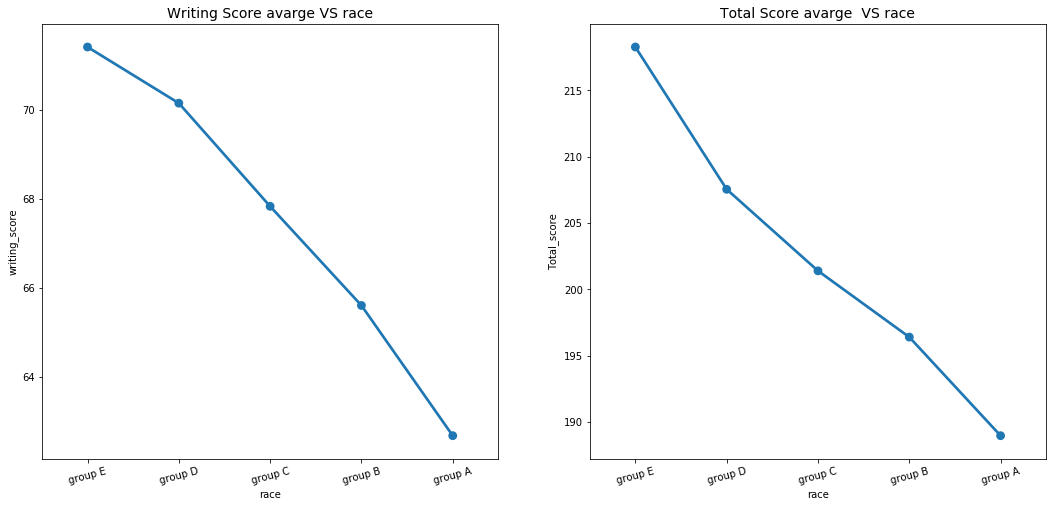

In [62]:
plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1);    
sb.pointplot(data=df2,x=g3.index, y=g3,color=color)
plt.title("Writing Score avarge VS race",fontweight = 30,fontsize=14);
plt.xticks(rotation=15);


plt.subplot(1, 2, 2);    
sb.pointplot(data=df2,x=g4.index, y=g4,color=color)
plt.title("Total Score avarge  VS race",fontweight = 30,fontsize=14);
plt.xticks(rotation=15);


# Result summary

## percentage (Pass/Fail ) of Total Score of students
-percentage of success = 98.5% and percentage of failed 1.5% 

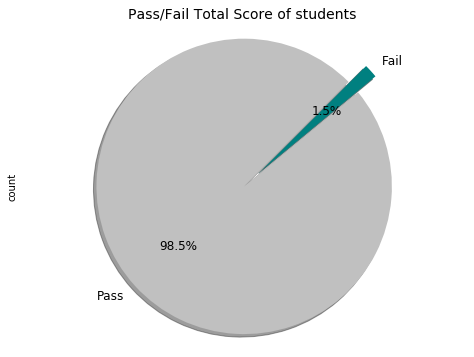

In [63]:
plt.figure(figsize = [8, 6])
plt.pie(df2['result_score'].value_counts()/n_df,labels=('Pass','Fail'),
        explode = [0.08,0.08],autopct ='%1.1f%%'
        ,shadow = True,startangle = 45, textprops={'fontsize': 12},colors=colors)
plt.title('Pass/Fail Total Score of students ',fontweight = 30,fontsize=14)
plt.ylabel('count')
plt.axis('equal')
plt.show()

# Conclusion


-Males are doing  better than females in maths 

-Females are doing better than males in writing and reading

-Parent education affected with the results of the students, the Students whose parents have completed master's or bachleor's     degree have not failed in any subject otherwise the highest rate of failuer with  the Students whose parents have some high   school.

-The students who completed Test Preparation course no one of them fail 

-the avarge highest grades at all 3 subjects and the total score happened at group "E"
 and the lowest avarge grade at all 3 subjects and the total score happened at group "A"
 
-percentage of success = 98.5% and percentage of failed 1.5%

